In [166]:
import geopandas as gpd
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt

In [106]:
AcresTable = pd.read_csv(r"C:\Users\catan\Desktop\programming final\AcresTotalsCounty20122017.csv")
Ag2012 = []
Ag2017 = []
random.seed(0)
for row in AcresTable:
    if 'AcresHarv2012' in row:
        Ag2012.append(row)
    if 'AcresHarv2017' in row:
        Ag2017.append(row)

colnames = ['county','NumOperations2012','AcresHarv2012', 'NumOperations2017', 'AcresHarv2017']
#data = pd.read_csv('AcresTotalsCounty20122017.csv', names=colnames)

col_list2012 = ["county", "AcresHarv2012"]
colorado2012 = pd.read_csv(r"C:\Users\catan\Desktop\programming final\AcresTotalsCounty20122017.csv", usecols=col_list2012)
col_list2017 = ["county", "AcresHarv2017"]
colorado2017 = pd.read_csv(r"C:\Users\catan\Desktop\programming final\AcresTotalsCounty20122017.csv", usecols = col_list2017)

top2012 = []
top2017 = []
top5 = ['adams', 'kitcarson', 'yuma', 'weld', 'phillips']
for row in colorado2012.iterrows():
    if 'county' == top5:
        top2012.append(row)

In [116]:
datatable = {'county': [], 'AcresHarv2012': [], 'AcresHarv2017': []}
#df = pd.DataFrame(columns = ['county', 'AcresHarv2012', 'AcresHarv2017'])

from csv import DictReader
Names = ["yuma", "weld", "phillips", "kitcarson", "adams"]

with open(r"C:\Users\catan\Desktop\programming final\AcresTotalsCounty20122017.csv", newline='') as csvfile:
    reader = DictReader(csvfile)
    #rows = [row for row in reader if row['county'] in Names]
    
    for row in reader:
        if row['county'] in Names:
            county = row['county']
            AcresHarv2012 = int(row['AcresHarv2012'])
            AcresHarv2017 = int(row['AcresHarv2017'])
            
            datatable['county'].append(county)
            datatable['AcresHarv2012'].append(AcresHarv2012)
            datatable['AcresHarv2017'].append(AcresHarv2017)
    
HarvGdf = gpd.GeoDataFrame(datatable)
    

In [117]:
HarvGdf

,county,AcresHarv2012,AcresHarv2017
0,adams,249061,283538
1,kitcarson,398644,497533
2,phillips,236894,248339
3,weld,426823,477839
4,yuma,364045,390328


In [118]:
#precipitation join

cty2012prcp = pd.read_csv(r"C:\Users\catan\Desktop\programming final\cty2012prcp.csv")
cty2017prcp = pd.read_csv(r"C:\Users\catan\Desktop\programming final\cty2017prcp.csv")

prcp_join = cty2012prcp.merge(cty2017prcp, on='county')

In [119]:
prcp_join

,county,avg_prcp2012,avg_prcp2017
0,adams,10.733571,13.666923
1,kitcarson,12.600000,24.474000
2,weld,9.984000,15.098571
3,yuma,10.690000,20.988000
4,phillips,11.196667,19.223333


In [120]:
all_data = prcp_join.merge(HarvGdf, on='county')

In [121]:
all_data

,county,avg_prcp2012,avg_prcp2017,AcresHarv2012,AcresHarv2017
0,adams,10.733571,13.666923,249061,283538
1,kitcarson,12.600000,24.474000,398644,497533
2,weld,9.984000,15.098571,426823,477839
3,yuma,10.690000,20.988000,364045,390328
4,phillips,11.196667,19.223333,236894,248339


In [122]:
all_data['prcp_change'] = ((all_data['avg_prcp2017'] - all_data['avg_prcp2012']) / all_data['avg_prcp2012']) * 100
all_data['harv_change'] = ((all_data['AcresHarv2017'] - all_data['AcresHarv2012']) / all_data['AcresHarv2012']) * 100

In [144]:
all_data.to_csv(r"C:\Users\catan\Desktop\programming final\final_proj.csv", index = False)
all_data

,county,avg_prcp2012,avg_prcp2017,AcresHarv2012,AcresHarv2017,prcp_change,harv_change
0,adams,10.733571,13.666923,249061,283538,27.328757,13.842794
1,kitcarson,12.600000,24.474000,398644,497533,94.238095,24.806344
2,weld,9.984000,15.098571,426823,477839,51.227679,11.952496
3,yuma,10.690000,20.988000,364045,390328,96.333022,7.219712
4,phillips,11.196667,19.223333,236894,248339,71.688002,4.831275


In [134]:
print("The county with the largest precipitation change is Yuma. The county with the largest acres harvest change is Kit Carson.")

The county with the largest precipitation change is Yuma. The county with the largest acres harvest change is Kit Carson.


,OBJECTID,FULL,LABEL,CNTY_FIPS,NUM_FIPS,CENT_LAT,CENT_LONG,US_FIPS,geometry,avg_prcp2012,avg_prcp2017,AcresHarv2012,AcresHarv2017,prcp_change,harv_change
COUNTY,,,,,,,,,,,,,,,
LARIMER,1,Larimer County,Larimer,069,69,40.666413,-105.461155,08069,"POLYGON ((-105.05672 40.34928, -105.05670 40.3...",NaN,NaN,NaN,NaN,NaN,NaN
LAS ANIMAS,2,Las Animas County,Las Animas,071,71,37.315851,-104.038716,08071,"POLYGON ((-104.14318 37.75833, -104.12615 37.7...",NaN,NaN,NaN,NaN,NaN,NaN
FREMONT,3,Fremont County,Fremont,043,43,38.472972,-105.439657,08043,"POLYGON ((-105.36889 38.25940, -105.36909 38.2...",NaN,NaN,NaN,NaN,NaN,NaN
GUNNISON,4,Gunnison County,Gunnison,051,51,38.666798,-107.031700,08051,"POLYGON ((-106.79969 38.97965, -106.80009 38.9...",NaN,NaN,NaN,NaN,NaN,NaN
CONEJOS,5,Conejos County,Conejos,021,21,37.200696,-106.191629,08021,"POLYGON ((-106.14887 37.40110, -106.14753 37.4...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DENVER,60,Denver County,Denver,031,31,39.762028,-104.876365,08031,"MULTIPOLYGON (((-104.93413 39.70015, -104.9341...",NaN,NaN,NaN,NaN,NaN,NaN
PARK,61,Park County,Park,093,93,39.119303,-105.717175,08093,"POLYGON ((-105.97508 38.91009, -105.97529 38.9...",NaN,NaN,NaN,NaN,NaN,NaN
EL PASO,62,El Paso County,El Paso,041,41,38.832093,-104.525583,08041,"POLYGON ((-104.86402 39.12979, -104.86381 39.1...",NaN,NaN,NaN,NaN,NaN,NaN


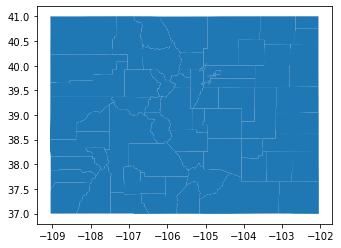

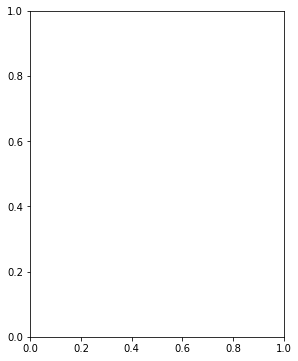

In [194]:
fp = r"C:\Users\catan\Desktop\programming final\Colorado_County_Boundaries-shp\Colorado_County_Boundaries.shp"
map_df = gpd.read_file(fp)
df = pd.read_csv(r"C:\Users\catan\Desktop\programming final\final_proj.csv", header=0)
merged = map_df.set_index('COUNTY').join(df.set_index('county'))
map_df.plot()
variable = merged['prcp_change']
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize = (10,6))
merged.plot(column = variable, cmap = 'Blues', linewidth = 0.8, ax = ax, edgecolor = '0.8')
merged
#ax.axis('off')
#ax.set_title('Colorado Counties Precipitation Change from 2012 to 2017', fontdict={'fontsize': '25', 'fontweight' : '3'})
#ax.annotate('Source: Colorado State University, Warner College; USDA', xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
#sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm._A = []
#cbar = fig.colorbar(sm)
#fig.savefig(r'C:\Users\catan\Desktop\programming final\map_export.png', dpi=300)

#plt.show()

In [ ]:
#create a chloropleth map
#Need: a GEOJson file and a list of values indexed by the same identifier (county)
#load in shapefile
fp = “//.shp”

#read the file
map_df = gpd.read_file(fp)

#check to make sure that is is a GEOdataframe
map_df.head()

#preview map
map_df.plot()

#read in .csv we created
df = pd.read_csv(“//.csv”, header=0)
df.head()

# join the geodataframe with the csv dataframe
merged = map_df.set_index(‘NAME’).join(data_for_map.set_index(‘borough’))
merged.head()

# set a variable that will call whatever column we want to visualise on the map
variable = ‘’

# set the range for the choropleth, this part I don't understand, we will just have to see
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap=’Blues’, linewidth=0.8, ax=ax, edgecolor=’0.8')
            
# remove the axis
ax.axis(‘off’)
            
# add a title
ax.set_title(‘Counties changed or something’, fontdict={‘fontsize’: ‘25’, ‘fontweight’ : ‘3’})
            
# create an annotation for the data source
ax.annotate('Source....'’,xy=(0.1, .08),  xycoords=’figure fraction’, horizontalalignment=’left’, verticalalignment=’top’, fontsize=12, color=’#555555')
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=’Blues’, norm=plt.Normalize(vmin=vmin, vmax=vmax))
            
# empty array for the data range
sm._A = []
            
# add the colorbar to the figure
cbar = fig.colorbar(sm)
            
#save map
fig.savefig(“map_export.png”, dpi=300)